**INSTALL UCIMLREPO LIBRARIE**

In [2]:
pip install ucimlrepo

**IMPORT ZIPFILE**

In [4]:
import zipfile

with zipfile.ZipFile('/content/bank+marketing.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/bank_marketing')

**IMPORT OS**

In [6]:
import os

# List all files in the extracted folder
extracted_files = os.listdir('/content/bank_marketing')
print(extracted_files)

['bank-additional.zip', 'bank.zip']


**IMPORT ZIPFILE AND OS SAME CELL**

In [8]:
import zipfile
import os

# Unzip and check the contents
with zipfile.ZipFile('/content/bank+marketing.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/bank_marketing')

# List the files in the extracted directory
extracted_files = os.listdir('/content/bank_marketing')
print(extracted_files)

['bank-additional.zip', 'bank.zip']



**ZIP FILES INSIDE THE EXTRACTED DIRECTORY**

In [10]:
# Extract 'bank.zip' and 'bank-additional.zip'
with zipfile.ZipFile('/content/bank_marketing/bank.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/bank_marketing/bank')

with zipfile.ZipFile('/content/bank_marketing/bank-additional.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/bank_marketing/bank_additional')

# List the contents of both extracted folders
print("Contents of bank folder:", os.listdir('/content/bank_marketing/bank'))
print("Contents of bank_additional folder:", os.listdir('/content/bank_marketing/bank_additional'))

Contents of bank folder: ['bank-full.csv', 'bank.csv', 'bank-names.txt']
Contents of bank_additional folder: ['__MACOSX', 'bank-additional']


**[LOAD THE DATASET ](https://)**

In [12]:
# Load the 'bank.csv' file
df = pd.read_csv('/content/bank_marketing/bank/bank.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


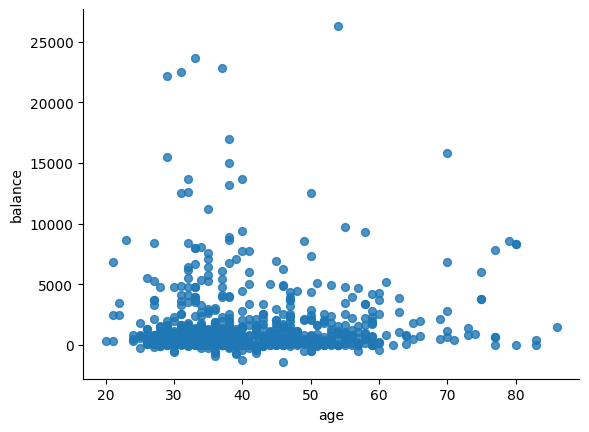

In [23]:
# @title age vs balance

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='age', y='balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**IMPORT ALL LIBRARIES**

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**DATA CLEANING**

In [16]:
# Replace 'unknown' with NaN and drop missing values
df = df.replace('unknown', pd.NA)
df = df.dropna()

# Check if any missing values are left
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


**CONVERT CATEGORICAL VARIABLES**

In [17]:
# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

**Exploratory Data Analysis (EDA)**

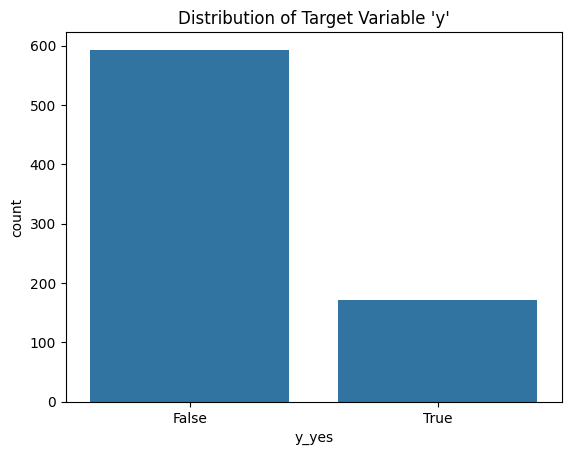

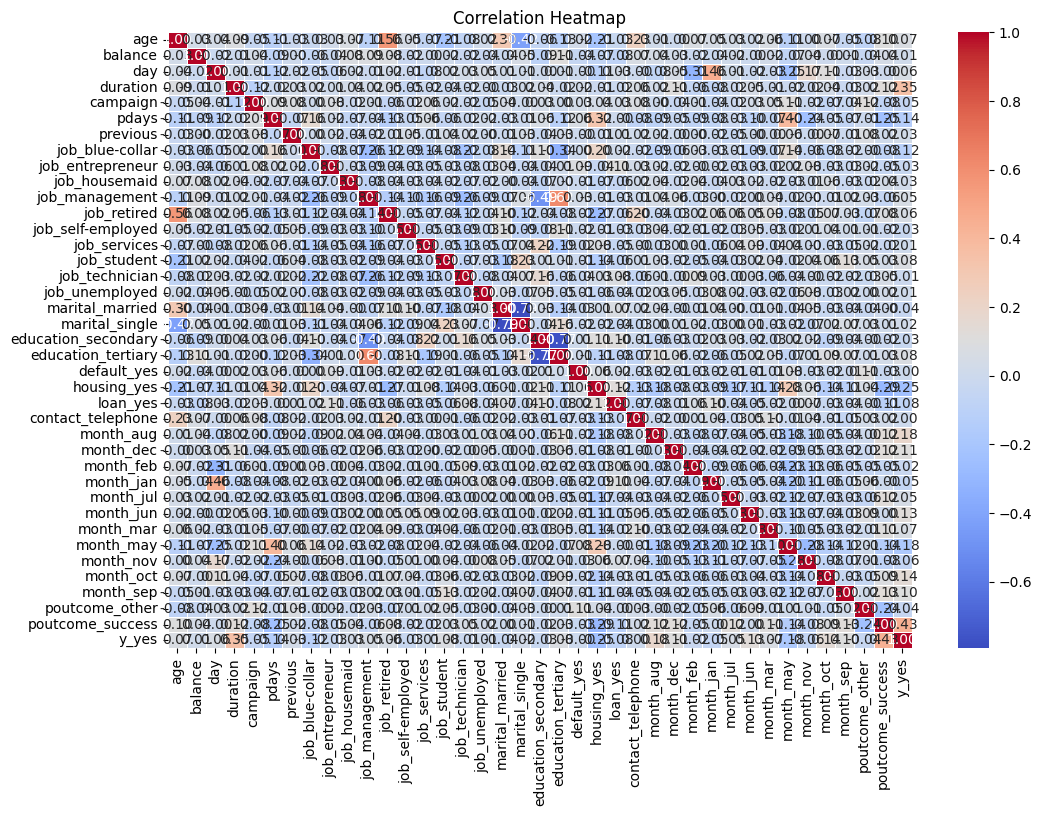

In [18]:
# Plot the target variable distribution
sns.countplot(x='y_yes', data=df)  # 'y_yes' after one-hot encoding
plt.title("Distribution of Target Variable 'y'")
plt.show()

# Display a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Prepare the Data for Modeling**

In [20]:
# Define the features (X) and target (y)
X = df.drop('y_yes', axis=1)  # 'y_yes' is the target variable after one-hot encoding
y = df['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Build and Train the Decision Tree Classifier**

In [21]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Make Predictions and Evaluate the Model**

Accuracy: 0.7608695652173914

Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.86      0.84       167
        True       0.57      0.49      0.53        63

    accuracy                           0.76       230
   macro avg       0.70      0.68      0.68       230
weighted avg       0.75      0.76      0.75       230



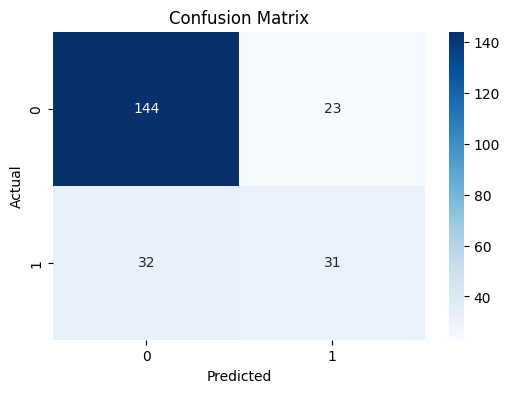

In [22]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()